# Data Preprocessing

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [83]:
df = pd.read_csv('data/raw/aug_train.csv')

## 1. Dataset Overview

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## 2. Duplicates

- check if there are any duplicate entries in the dataset

In [85]:
df.duplicated().sum()

0

## 3. Missing Data

- check if there are any missing data in the dataset

In [86]:
pd.DataFrame({
    'Missing Count': df.isna().sum(),
    'Missing %': (df.isna().sum() / df.shape[0] * 100).round(2)
})

,Missing Count,Missing %
enrollee_id,0,0.00
city,0,0.00
city_development_index,0,0.00
gender,4508,23.53
relevent_experience,0,0.00
enrolled_university,386,2.01
education_level,460,2.40
major_discipline,2813,14.68
experience,65,0.34
company_size,5938,30.99


- For the columns that contains less than 3% missing values, we will drop the rows that contains missing entries. For all other columns having more than 10% missing values, noticing all of them are categorical variables, we will add a corresponding missing values indicator column and then encode the missing entries as 'MISSING'.

### 3.1 Drop Rows with `NaN` for columns:
- enrolled_university
- education_level
- experience
- last_new_job

In [87]:
df.dropna(subset=['enrolled_university', 'education_level', 'experience', 'last_new_job'], inplace=True)

In [88]:
pd.DataFrame({
    'Missing Count': df.isna().sum(),
    'Missing %': (df.isna().sum() / df.shape[0] * 100).round(2)
})

,Missing Count,Missing %
enrollee_id,0,0.00
city,0,0.00
city_development_index,0,0.00
gender,3863,21.44
relevent_experience,0,0.00
enrolled_university,0,0.00
education_level,0,0.00
major_discipline,2222,12.33
experience,0,0.00
company_size,5310,29.48


### 3.2 Impute missing values and add missing values indicator column for columns:
- gender
- major_discipline
- company_size
- company_type

In [89]:
impute_list = ['gender', 'major_discipline', 'company_size', 'company_type']

for column in impute_list:
    df[column + '_missing'] = df[column].isna().astype(int)
    df[column].fillna(value='MISSING', inplace=True)

In [90]:
pd.DataFrame({
    'Missing Count': df.isna().sum(),
    'Missing %': (df.isna().sum() / df.shape[0] * 100).round(2)
})

,Missing Count,Missing %
enrollee_id,0,0.0
city,0,0.0
city_development_index,0,0.0
gender,0,0.0
relevent_experience,0,0.0
enrolled_university,0,0.0
education_level,0,0.0
major_discipline,0,0.0
experience,0,0.0
company_size,0,0.0


## 4. Output of data preprocessing

In [100]:
# df.to_csv('data/clean/hr_analytics.csv', index=False)

## 5. Data Scaling and Skewness (to consider when using linear models)

In [76]:
df.city_development_index.agg(['min', 'max', 'mean']).round(4)

min     0.4480
max     0.9490
mean    0.8317
Name: city_development_index, dtype: float64

In [77]:
df.training_hours.agg(['min', 'max', 'mean']).round(4)

min       1.0000
max     336.0000
mean     65.3479
Name: training_hours, dtype: float64

- when using linear models, we might need to consider a log transformation on the `training_hours` feature so as to obtain a normal distribution on the transformed feature which better suits the requirements of such type of models.

Text(0.5, 0, 'log transform')

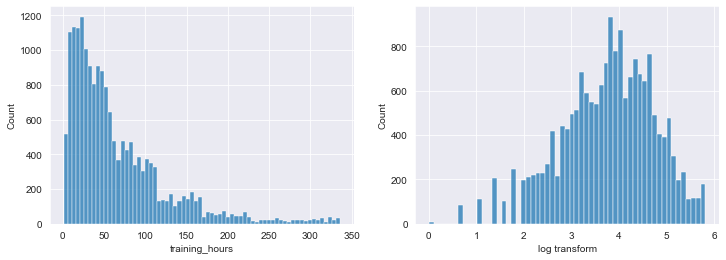

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x=df.training_hours, ax=ax[0]);
sns.histplot(x=df.training_hours.apply(np.log), ax=ax[1]); ax[1].set_xlabel('log transform')